In [1]:
import numpy as np
import pandas as pd
import json

In [50]:
import json
db = json.load(open("datasets/usda_food/database.json"))
db[:10]

[{'id': 1008,
  'description': 'Cheese, caraway',
  'tags': [],
  'manufacturer': '',
  'group': 'Dairy and Egg Products',
  'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}],
  'nutrients': [{'value': 25.18,
    'units': 'g',
    'description': 'Protein',
    'group': 'Composition'},
   {'value': 29.2,
    'units': 'g',
    'description': 'Total lipid (fat)',
    'group': 'Composition'},
   {'value': 3.06,
    'units': 'g',
    'description': 'Carbohydrate, by difference',
    'group': 'Composition'},
   {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
   {'value': 376.0,
    'units': 'kcal',
    'description': 'Energy',
    'group': 'Energy'},
   {'value': 39.28,
    'units': 'g',
    'description': 'Water',
    'group': 'Composition'},
   {'value': 1573.0,
    'units': 'kJ',
    'description': 'Energy',
    'group': 'Energy'},
   {'value': 0.0,
    'units': 'g',
    'description': 'Fiber, total dietary',
    'group': 'Composition'},
   {'value': 673.0,


In [51]:
len(db)

6636

In [52]:
data = pd.DataFrame(db)
data.shape
data.head()
data.shape

(6636, 7)

In [53]:
data

,id,description,tags,manufacturer,group,portions,nutrients
0,1008,"Cheese, caraway",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 25.18, 'units': 'g', 'description':..."
1,1009,"Cheese, cheddar",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, diced', 'grams': ...","[{'value': 24.9, 'units': 'g', 'description': ..."
2,1018,"Cheese, edam",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}, ...","[{'value': 4.22, 'units': 'g', 'description': ..."
3,1019,"Cheese, feta",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'cup, crumbled', 'grams...","[{'value': 5.2, 'units': 'g', 'description': '..."
4,1028,"Cheese, mozzarella, part skim milk",[],,Dairy and Egg Products,"[{'amount': 1, 'unit': 'oz', 'grams': 28.35}]","[{'value': 3.27, 'units': 'g', 'description': ..."
...,...,...,...,...,...,...,...
6631,42161,"Bologna, beef, low fat",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'slice', 'grams': 28.0}...","[{'value': 11.8, 'units': 'g', 'description': ..."
6632,42173,"Turkey and pork sausage, fresh, bulk, patty or...",[],,Sausages and Luncheon Meats,"[{'amount': 1, 'unit': 'cup, cooked', 'grams':...","[{'value': 22.7, 'units': 'g', 'description': ..."
6633,43408,"Babyfood, juice, pear",[],None,Baby Foods,"[{'amount': 1, 'unit': 'fl oz', 'grams': 31.2}...","[{'value': 0.0, 'units': 'g', 'description': '..."
6634,43539,"Babyfood, dessert, banana yogurt, strained",[],None,Baby Foods,"[{'amount': 1, 'unit': 'tbsp', 'grams': 15.0},...","[{'value': 1.1, 'units': 'g', 'description': '..."


In [67]:
portions = data.explode("portions").drop("nutrients", axis=1)
portions
portions.dropna(subset="portions", inplace=True)
columns = ["por_amount", "portion", "por_grams"]
portions_df = pd.DataFrame(portions["portions"].to_list(), index=portions["id"])
portions_df.columns = columns
portions_df = portions_df.reset_index()
portions_df

,id,por_amount,portion,por_grams
0,1008,1,oz,28.35
1,1009,1,"cup, diced",132.00
2,1009,2,"cup, melted",244.00
3,1009,3,"cup, shredded",113.00
4,1009,4,oz,28.35
...,...,...,...,...
11140,43546,3,jar Beech-Nut Baby's First (2.5 oz),71.00
11141,43546,4,jar Beech-Nut Stage I (4 oz),113.00
11142,43546,5,jar Gerber First Foods (2.5 oz),71.00
11143,43546,6,jar Earth's Best (4.5 oz),128.00


In [68]:
nutrients = data.explode("nutrients").drop("portions", axis=1)
nutrients
nutrients.dropna(subset="nutrients", inplace=True)
columns = ["nut_amount", "nut_unit", "nutrient", "nut_group"]
nutrients_df = pd.DataFrame(nutrients["nutrients"].to_list(), index=nutrients["id"])
nutrients_df.columns = columns
nutrients_df = nutrients_df.reset_index()
nutrients_df
nutrients_df = nutrients_df.drop_duplicates()

In [69]:
nutrients_df.duplicated().sum()

0

In [70]:
metadata = data[["id", "tags", "description", "manufacturer", "group"]]
meta_nut_df = pd.merge(metadata, nutrients_df, on="id")

In [74]:
meta_nut_df["group"].value_counts()

Vegetables and Vegetable Products    49818
Beef Products                        43479
Baked Products                       27883
Pork Products                        23503
Breakfast Cereals                    20212
Fast Foods                           19360
Lamb, Veal, and Game Products        19265
Fruits and Fruit Juices              18757
Legumes and Legume Products          17964
Finfish and Shellfish Products       16165
Sweets                               16054
Beverages                            12329
Cereal Grains and Pasta              11846
Baby Foods                           11306
Soups, Sauces, and Gravies           10348
Snacks                                9189
Nut and Seed Products                 8351
Poultry Products                      7176
Sausages and Luncheon Meats           6350
Ethnic Foods                          6290
Dairy and Egg Products                6089
Fats and Oils                         5011
Restaurant Foods                      3142
Spices and 

In [75]:
data["group"].value_counts()

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods                      51
Spices and Herbs

plot median values by food group and nutrient type

In [78]:
median_nuts = meta_nut_df.groupby(["group", "nutrient"])["nut_amount"].quantile(0.5)
median_nuts

group                              nutrient                    
Baby Foods                         Alanine                          0.085
                                   Alcohol, ethyl                   0.000
                                   Arginine                         0.104
                                   Ash                              0.620
                                   Aspartic acid                    0.220
                                                                    ...  
Vegetables and Vegetable Products  Vitamin E (alpha-tocopherol)     0.290
                                   Vitamin E, added                 0.000
                                   Vitamin K (phylloquinone)        9.000
                                   Water                           89.195
                                   Zinc, Zn                         0.330
Name: nut_amount, Length: 2246, dtype: float64

<AxesSubplot:ylabel='group'>

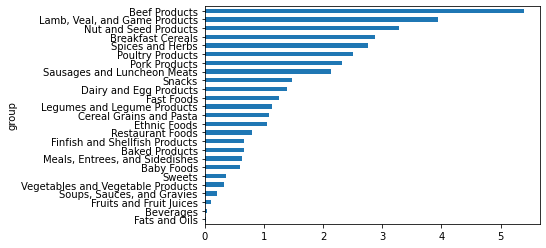

In [84]:
median_nuts.loc[:, "Zinc, Zn"].sort_values().plot(kind="barh")

which food is most dense in nutrient

In [85]:
meta_nut_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            375176 non-null  int64  
 1   tags          375176 non-null  object 
 2   description   375176 non-null  object 
 3   manufacturer  293054 non-null  object 
 4   group         375176 non-null  object 
 5   nut_amount    375176 non-null  float64
 6   nut_unit      375176 non-null  object 
 7   nutrient      375176 non-null  object 
 8   nut_group     375176 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 28.6+ MB


In [95]:
by_nut = meta_nut_df.groupby(["nut_group", "nutrient"])
def best_food(group):
    return group.sort_values("nut_amount", ascending=False).iloc[0] #["description"]
rich_foods = by_nut.apply(best_food)[["description", "nut_amount"]]

In [96]:
rich_foods

description  \
nut_group   nutrient                                                                          
Amino Acids Alanine                                       Gelatins, dry powder, unsweetened   
            Arginine                                           Seeds, sesame flour, low-fat   
            Aspartic acid                                               Soy protein isolate   
            Cystine                            Seeds, cottonseed flour, low fat (glandless)   
            Glutamic acid                                               Soy protein isolate   
...                                                                                     ...   
Vitamins    Vitamin D2 (ergocalciferol)                             Mushrooms, maitake, raw   
            Vitamin D3 (cholecalciferol)                      Fish, halibut, Greenland, raw   
            Vitamin E (alpha-tocopherol)                                    Oil, wheat germ   
            Vitamin E, added              Cereals ready-to-eat, GENERAL MILLS, Multi-Gra...   
            Vitamin K (phylloquinone)                                  Spices, sage, ground   

                                          nut_amount  
nut_group   nutrient                                  
Amino Acids Alanine                            8.009  
            Arginine                           7.436  
            Aspartic acid                     10.203  
            Cystine                            1.307  
            Glutamic acid                     17.452  
...                                              ...  
Vitamins    Vitamin D2 (ergocalciferol)       28.100  
            Vitamin D3 (cholecalciferol)      27.400  
            Vitamin E (alpha-tocopherol)     149.400  
            Vitamin E, added                  46.550  
            Vitamin K (phylloquinone)       1714.500  

[94 rows x 2 columns]

In [97]:
rich_foods.loc["Amino Acids"]

,description,nut_amount
nutrient,,
Alanine,"Gelatins, dry powder, unsweetened",8.009
Arginine,"Seeds, sesame flour, low-fat",7.436
Aspartic acid,Soy protein isolate,10.203
Cystine,"Seeds, cottonseed flour, low fat (glandless)",1.307
Glutamic acid,Soy protein isolate,17.452
Glycine,"Gelatins, dry powder, unsweetened",19.049
Histidine,"Whale, beluga, meat, dried (Alaska Native)",2.999
Hydroxyproline,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...",0.803
Isoleucine,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE...",4.300
